In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from astropy.table import Table, vstack
import glob

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize']

[12.0, 8.0]

# Data analysis

# MC - Data comparison

In [3]:
def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        #ax.set_ylim(0.042,0.07)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(1000,3500)

In [16]:
#OPT_EFF=[0.6, 0.7, 0.8, 0.89]
OPT_EFF=[0.7, 0.8, 0.9, 1.0]
colors = ['C0', 'C1', 'C2', 'C3', 'C4']


In [17]:
# size (intensity) outside the ring, to get rid of hadronic showers
size_outside = 500 # phe

## Analyze real muon data from 20201120

In [18]:
from astropy.table import Table, vstack
import glob


listdir = glob.glob('/fefs/aswg/data/real/DL1/20201120/v0.8.3/muons_LST-1.Run029*')
#listdir = glob.glob('../data/20201120/v0.8.3/muons_LST-1.Run029*')
# Muons analyzed using GlobalPeakWindowSum

dat = Table.read('{}'.format(listdir[0]), format='fits')
for i in range(1,len(listdir)):
    dat2 = Table.read('{}'.format(listdir[i]), format='fits')
    if(len(dat2) == 0):
        continue
    dat = vstack([dat, dat2])

df = dat.to_pandas()
df_good_data = df[df['good_ring']]

In [19]:
!ls /fefs/aswg/workspace/analysis-school-2022/muons/mc/

Scale0.6  Scale0.8    Scale0.885  Scale0.895  Scale0.95
Scale0.7  Scale0.875  Scale0.89   Scale0.9    Scale1.0


Now we load the MC and plot everything together

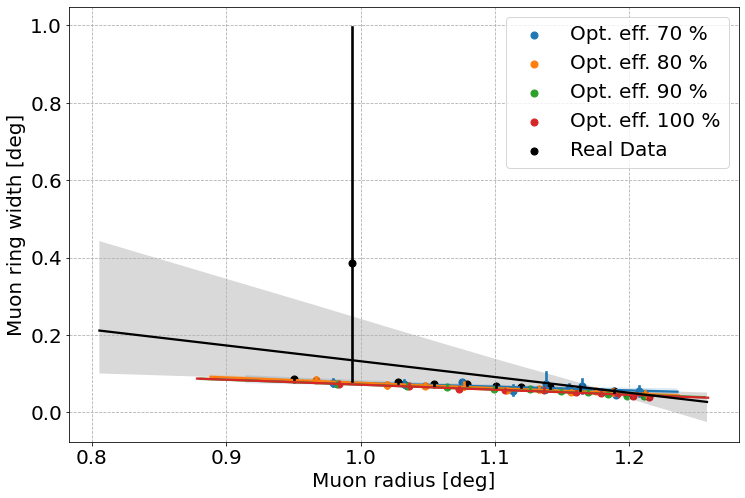

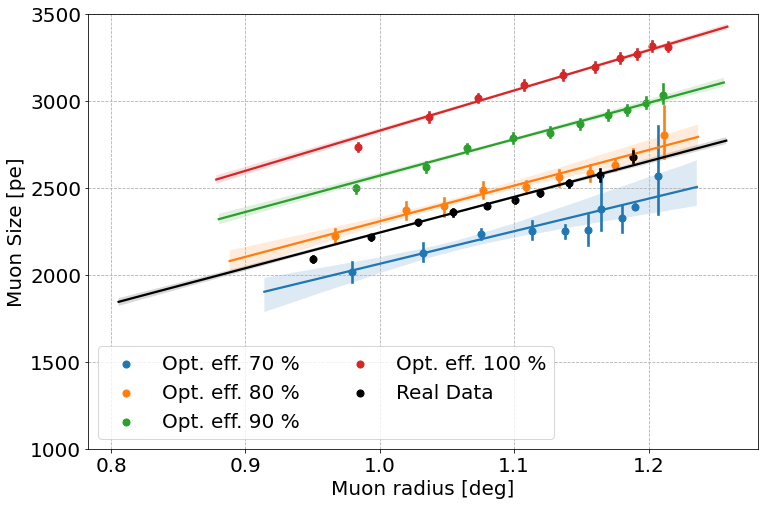

In [20]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

for (opt_eff, col) in zip(OPT_EFF, colors):
    #listdir=glob.glob(f'../../INFN/Teaching/2021_02_School/intro-iact-analysis/notebooks/data/muons/mc/Scale{opt_eff}/muon_run*')
    listdir=glob.glob(f'/fefs/aswg/workspace/analysis-school-2022/muons/mc/Scale{opt_eff}/dl1*fits')
    dat = Table.read('{}'.format(listdir[0]), format='fits')
    for i in range(1,len(listdir)):
        dat2 = Table.read('{}'.format(listdir[i]), format='fits')
        dat = vstack([dat, dat2])
    df = dat.to_pandas()
    df_good = df[df['good_ring']]
    
    
    sns.regplot(x = df_good['ring_radius'][(df_good['ring_completeness'] > 0.9) 
                                           & (df_good['size_outside'] < size_outside)
                                           & (df_good['ring_width'] < 0.3)], 
            y = df_good['ring_width'][(df_good['ring_completeness'] > 0.9) 
                                     & (df_good['size_outside'] < size_outside)
                                     & (df_good['ring_width'] < 0.3)], x_bins=10, 
                ax=ax, color=col, label='Opt. eff. %.0f %%' %(opt_eff*100))
    sns.regplot(x = df_good['ring_radius'][(df_good['ring_completeness'] > 0.9) 
                                           & (df_good['size_outside'] < size_outside)
                                           & (df_good['ring_width'] < 0.3)], 
            y = df_good['ring_size'][(df_good['ring_completeness'] > 0.9) 
                                     & (df_good['size_outside'] < size_outside)
                                     & (df_good['ring_width'] < 0.3)], x_bins=10, 
                ax=ax2, color=col, label='Opt. eff. %.0f %%' %(opt_eff*100))


sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            x_bins=10, ax=ax, color = 'k', label = 'Real Data')
sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            x_bins=10, ax=ax2, color = 'k', label = 'Real Data')

format_axes(ax,'width')        
format_axes(ax2,'size') 

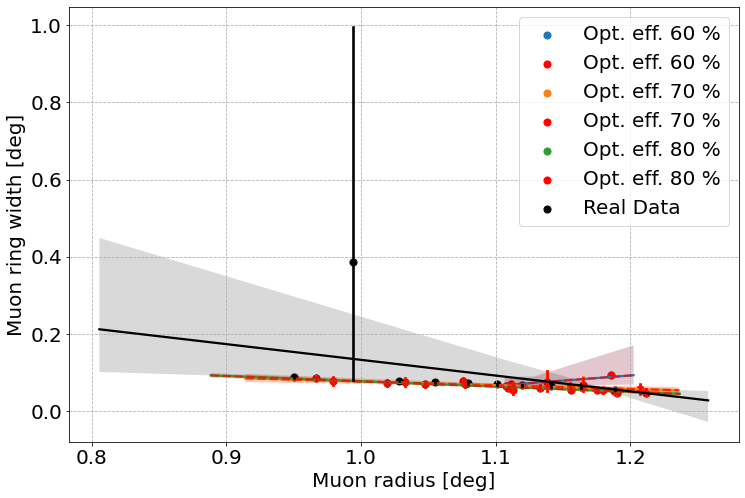

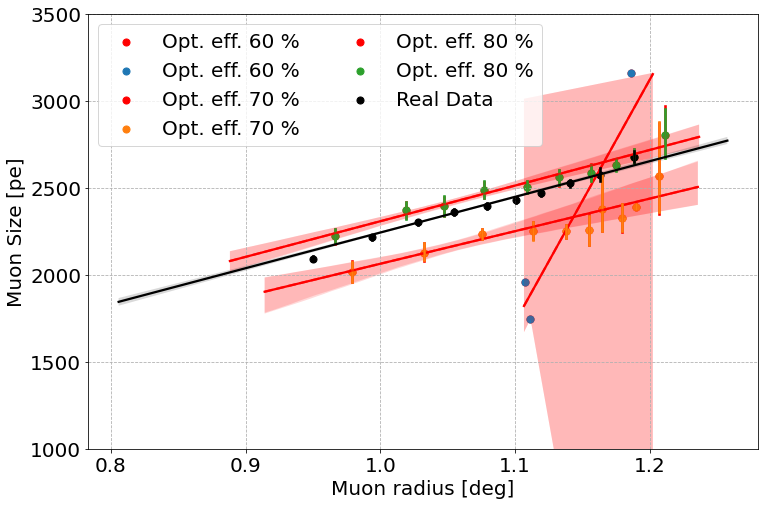

In [58]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

for (opt_eff, col) in zip(OPT_EFF, colors):
    #listdir=glob.glob(f'../../INFN/Teaching/2021_02_School/intro-iact-analysis/notebooks/data/muons/mc/Scale{opt_eff}/muon_run*')
    listdir=glob.glob(f'../mc/lst-dev7_old/dl1/Scale{opt_eff}/dl1*fits')
    dat = Table.read('{}'.format(listdir[0]), format='fits')
    for i in range(1,len(listdir)):
        dat2 = Table.read('{}'.format(listdir[i]), format='fits')
        dat = vstack([dat, dat2])
    df = dat.to_pandas()
    df_good = df[df['good_ring']]
    
    
    #listdir=glob.glob(f'../../INFN/Teaching/2021_02_School/intro-iact-analysis/notebooks/data/muons/mc/Scale{opt_eff}/muon_run*')
    listdir=glob.glob(f'../mc/dl1/Scale{opt_eff}/dl1*fits')
    dat = Table.read('{}'.format(listdir[0]), format='fits')
    for i in range(1,len(listdir)):
        dat2 = Table.read('{}'.format(listdir[i]), format='fits')
        dat = vstack([dat, dat2])
    df_v8 = dat.to_pandas()
    df_good_v8 = df_v8[df_v8['good_ring']]
    
    
    sns.regplot(x = df_good['ring_radius'][(df_good['ring_completeness'] > 0.9) 
                                           & (df_good['size_outside'] < size_outside)
                                           & (df_good['ring_width'] < 0.3)], 
            y = df_good['ring_width'][(df_good['ring_completeness'] > 0.9) 
                                     & (df_good['size_outside'] < size_outside)
                                     & (df_good['ring_width'] < 0.3)], x_bins=10, 
                ax=ax, color=col, label='Opt. eff. %.0f %%' %(opt_eff*100))
    sns.regplot(x = df_good['ring_radius'][(df_good['ring_completeness'] > 0.9) 
                                           & (df_good['size_outside'] < size_outside)
                                           & (df_good['ring_width'] < 0.3)], 
            y = df_good['ring_size'][(df_good['ring_completeness'] > 0.9) 
                                     & (df_good['size_outside'] < size_outside)
                                     & (df_good['ring_width'] < 0.3)], x_bins=10, 
                ax=ax2, color='r', label='Opt. eff. %.0f %%' %(opt_eff*100))
    
    sns.regplot(x = df_good_v8['ring_radius'][(df_good_v8['ring_completeness'] > 0.9) 
                                           & (df_good_v8['size_outside'] < size_outside)
                                           & (df_good_v8['ring_width'] < 0.3)], 
            y = df_good_v8['ring_width'][(df_good_v8['ring_completeness'] > 0.9) 
                                     & (df_good_v8['size_outside'] < size_outside)
                                     & (df_good_v8['ring_width'] < 0.3)], x_bins=10, 
                ax=ax, color='r', label='Opt. eff. %.0f %%' %(opt_eff*100), line_kws={"color":'r',"alpha":0.7,"ls":'dashed'})
    sns.regplot(x = df_good_v8['ring_radius'][(df_good_v8['ring_completeness'] > 0.9) 
                                           & (df_good_v8['size_outside'] < size_outside)
                                           & (df_good_v8['ring_width'] < 0.3)], 
            y = df_good_v8['ring_size'][(df_good_v8['ring_completeness'] > 0.9) 
                                     & (df_good_v8['size_outside'] < size_outside)
                                     & (df_good_v8['ring_width'] < 0.3)], x_bins=10, 
                ax=ax2, color=col, label='Opt. eff. %.0f %%' %(opt_eff*100), line_kws={"color":'r',"alpha":0.7,"ls":'dashed'})


sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            x_bins=10, ax=ax, color = 'k', label = 'Real Data')
sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            x_bins=10, ax=ax2, color = 'k', label = 'Real Data')


format_axes(ax,'width')        
format_axes(ax2,'size') 